Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1.satisfaction_level​ - Уровень удовлетворенности работой
2.Last_evaluation ​- Время с момента последней оценки в годах
3.number_projects​ - Количество проектов, выполненных за время работы
4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5.time_spend_company​ - Стаж работы в компании в годах
6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7.left​ - уволился ли сотрудник
8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9.department ​- отдел в котором работает сотрудник
10.salary​ - относительный уровень зарплаты
Требуется выполнить следующее задание:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Задание 1: Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv', na_values='?')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Задание 2:Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# мода
print(df.satisfaction_level.mode()[0])
print(df.last_evaluation.mode()[0])
print(df.number_project.mode()[0])
print(df.average_montly_hours.mode()[0])
print(df.time_spend_company.mode()[0])
print(df.Work_accident.mode()[0])
print(df.left.mode()[0])
print(df.promotion_last_5years.mode()[0])
print(df.department.mode()[0])
print(df.salary.mode()[0])


0.1
0.55
4
135
3
0
0
0
sales
low


In [7]:
# Задание 3: Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.

import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.iloc[:, [0,1,2,3,4,5,6,7]]
df_corr.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


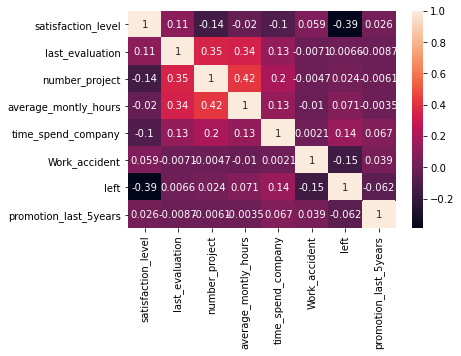

In [8]:
sns.heatmap(df_corr.corr(), annot=True)

Итого, получается, что 2 наиболее скоррелированные величины (0.42): кол-во проектов и среднее кол-во рабочих часов в месяц, что логично. А также уровень удовлетворенности и уход сотрудников (-0.39)
Наименее скоррелированные (0.0021) кол-во лет работы в компании и аварийные случаи с работником на рабочем месте

In [9]:
# Задание 4:Рассчитайте сколько сотрудников работает в каждом департаменте.
# просто по каждому департаменту:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [10]:
# те, кто остались и работает сейчас(за вычетом уволившихся):
df_people=df[df.left==0].groupby('department').count()['left']
df_people

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: left, dtype: int64

In [11]:
# Задание 5:Показать распределение сотрудников по зарплатам


In [33]:
df_salary = df[['salary', 'left']].groupby('salary').count()
df_salary.columns = ['employees']
df_salary.head()


,employees
salary,
high,1237
low,7316
medium,6446


In [ ]:
Задание 6: Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [36]:
df_salary_department = df[['department', 'salary', 'left']].groupby(['department','salary']).count()
df_salary_department.columns = ['employees']
df_salary_department

employees
department  salary           
IT          high           83
            low           609
            medium        535
RandD       high           51
            low           364
            medium        372
accounting  high           74
            low           358
            medium        335
hr          high           45
            low           335
            medium        359
management  high          225
            low           180
            medium        225
marketing   high           80
            low           402
            medium        376
product_mng high           68
            low           451
            medium        383
sales       high          269
            low          2099
            medium       1772
support     high          141
            low          1146
            medium        942
technical   high          201
            low          1372
            medium       1147

Задание 7: Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [19]:
df.groupby('salary').mean()[['average_montly_hours']].head()

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


Итак, получается, что гипотеза не соответствует действительности. Сотрудники с высоким окладом в среднем проводят на работе немного меньше времени, чем сотрудники с низким окладом. Разница 1 час в среднем в месяц на человека. 

Задание 8: Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
●Доля сотрудников с повышением за последние 5 лет
●Средняя степень удовлетворенности
●Среднее количество проектов

In [34]:
df_left = (df.groupby('left').agg({'promotion_last_5years':[lambda x: (x.sum()/x.count())*100], 
                                   'satisfaction_level':'mean', 'number_project':'mean'})
           [['promotion_last_5years', 'satisfaction_level', 'number_project']])

df_left.columns = ['%_of_promoted', 'average_satisfaction_level', 'average_number_of_projects']
df_left.head()

,%_of_promoted,average_satisfaction_level,average_number_of_projects
left,,,
0,2.625131,0.666810,3.786664
1,0.532064,0.440098,3.855503
